In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [36]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fashion MNIST Dataset/fashion-mnist_train.csv')

In [37]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [39]:
data_train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

<Axes: xlabel='label', ylabel='count'>

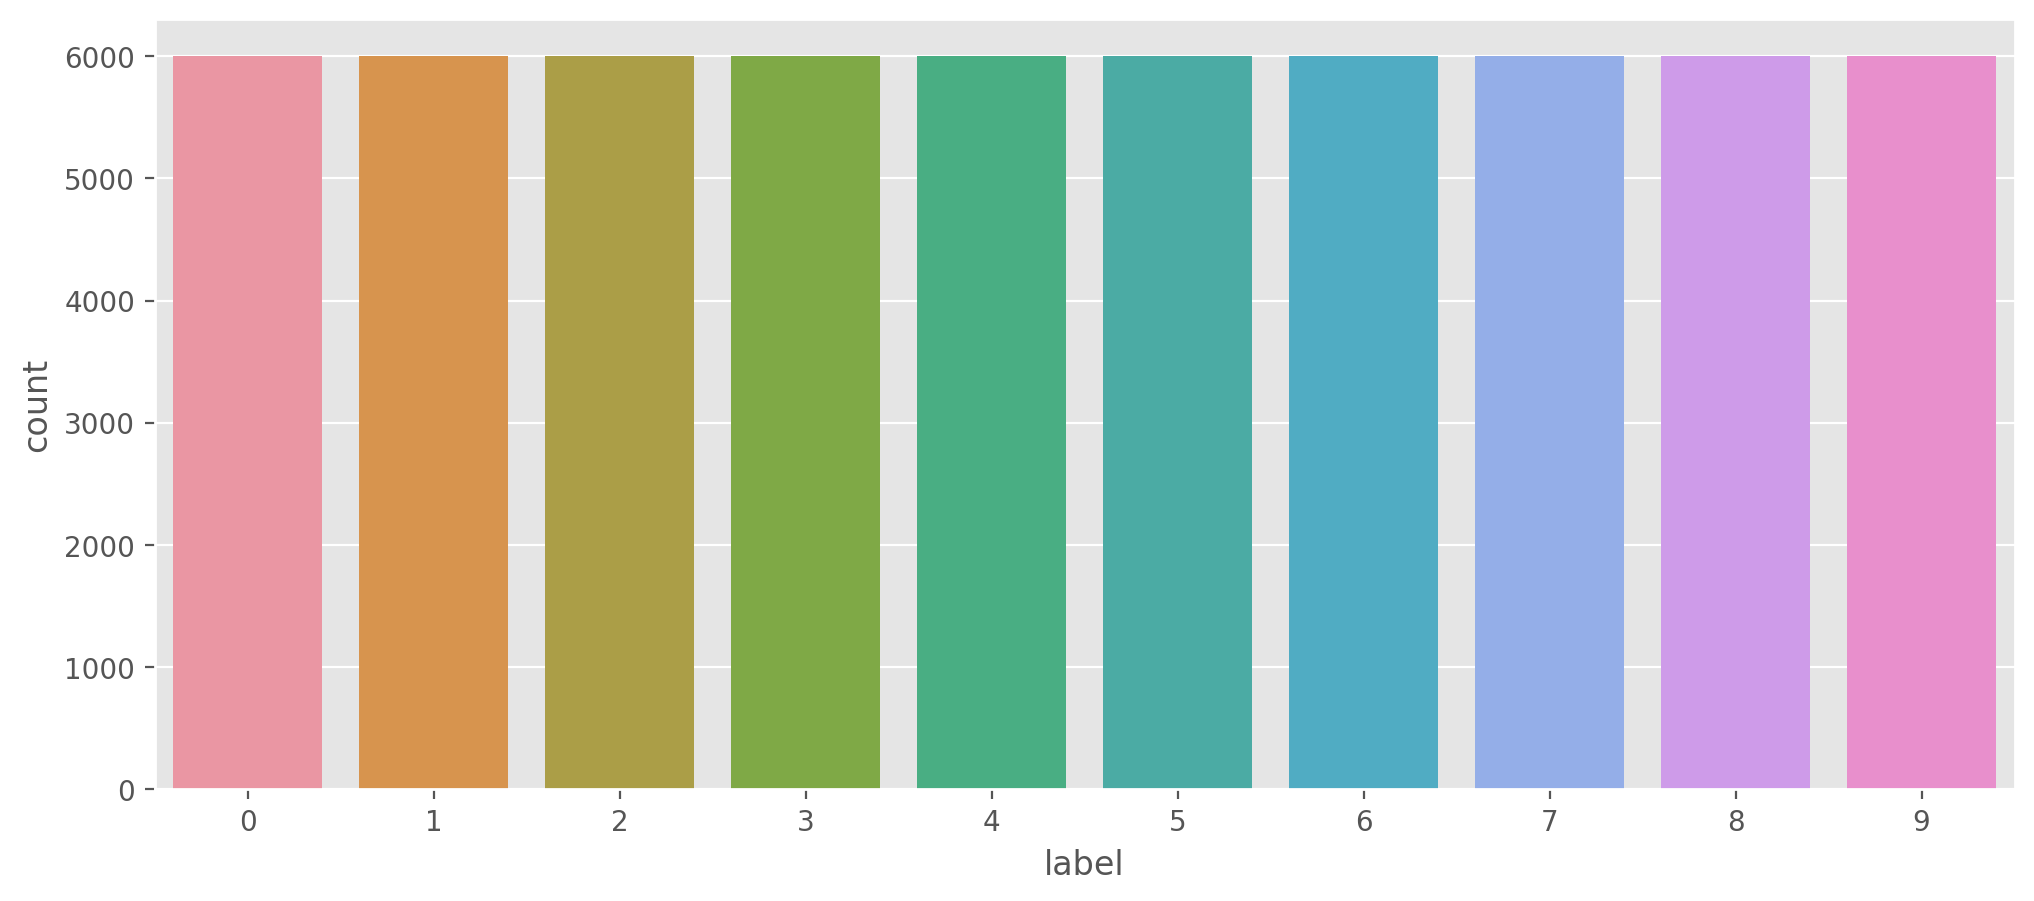

In [40]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'label', data= data_train)

In [41]:
x_train = data_train.drop(['label'], axis = 1).values
y_train = data_train[['label']].values

print('Data Shape   : ', x_train.shape)
print('Labels Shape : ', y_train.shape)

Data Shape   :  (60000, 784)
Labels Shape :  (60000, 1)


(-0.5, 27.5, 27.5, -0.5)

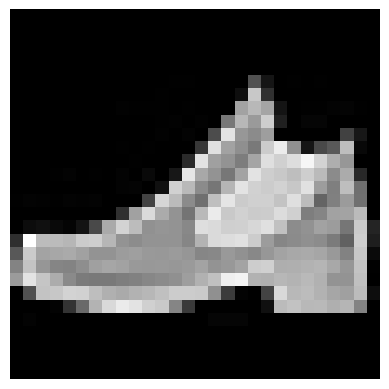

In [42]:
plt.imshow(x_train[1].reshape(28,28), cmap = 'gray')
plt.axis('off')

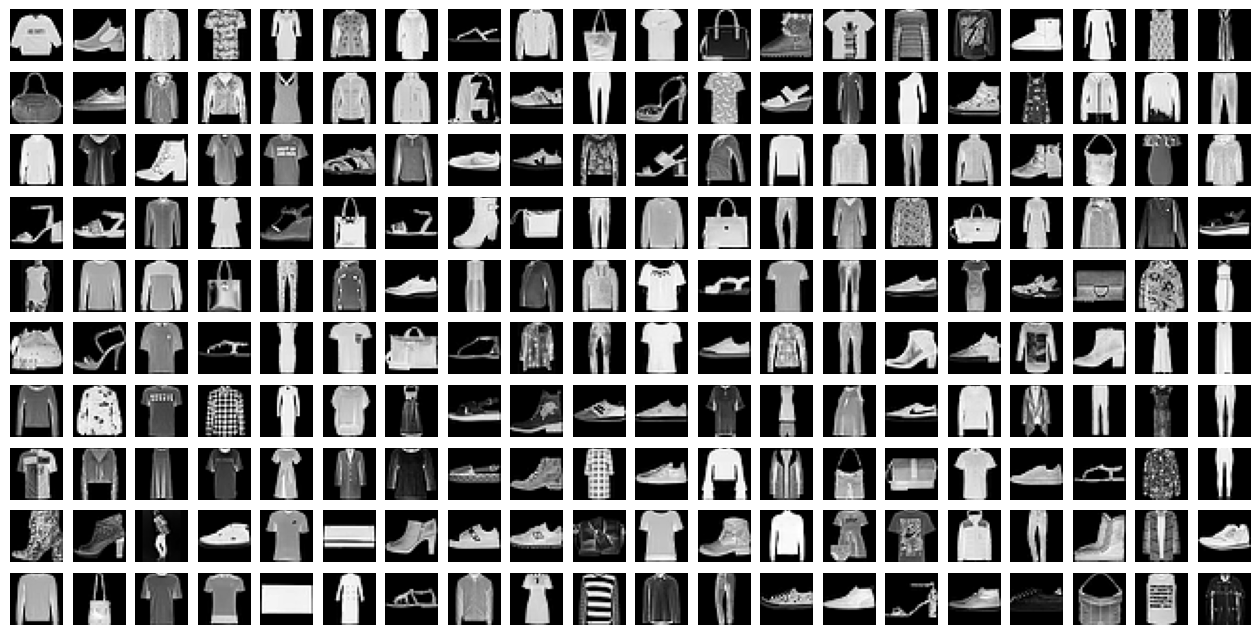

In [43]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap = 'gray')
  plt.axis('off')

In [44]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fashion MNIST Dataset/fashion-mnist_test.csv')

In [45]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x_test = data_test.drop(['label'], axis = 1).values
y_test = data_test[['label']].values

print('Data Shape   : ', x_test.shape)
print('Labels Shape : ', y_test.shape)

Data Shape   :  (10000, 784)
Labels Shape :  (10000, 1)


In [47]:
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

print('Training data Shape   : ', x_train.shape)
print('Training labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data Shape   :  (60000, 784)
Training labels Shape :  (60000, 10)
Testing Data Shape    :  (10000, 784)
Testing labels shape  :  (10000, 10)


In [48]:
x_train = x_train/255
x_test  = x_test/255

In [58]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (784,1)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 200)               157000    
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [60]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 500,
    epochs = 60,
    verbose = 1
)

Epoch 1/60
120/120 [==============================] - 6s 6ms/step - loss: 1.7141 - accuracy: 0.5113 - val_loss: 1.2524 - val_accuracy: 0.6539
Epoch 2/60
120/120 [==============================] - 1s 4ms/step - loss: 1.0430 - accuracy: 0.6867 - val_loss: 0.9105 - val_accuracy: 0.7088
Epoch 3/60
120/120 [==============================] - 1s 4ms/step - loss: 0.8337 - accuracy: 0.7331 - val_loss: 0.7849 - val_accuracy: 0.7497
Epoch 4/60
120/120 [==============================] - 1s 4ms/step - loss: 0.7392 - accuracy: 0.7617 - val_loss: 0.7155 - val_accuracy: 0.7668
Epoch 5/60
120/120 [==============================] - 1s 4ms/step - loss: 0.6816 - accuracy: 0.7791 - val_loss: 0.6663 - val_accuracy: 0.7864
Epoch 6/60
120/120 [==============================] - 1s 4ms/step - loss: 0.6416 - accuracy: 0.7905 - val_loss: 0.6306 - val_accuracy: 0.7979
Epoch 7/60
120/120 [==============================] - 1s 4ms/step - loss: 0.6108 - accuracy: 0.8000 - val_loss: 0.6077 - val_accuracy: 0.8016
Epoch 

In [61]:
type(history.history)

dict

In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

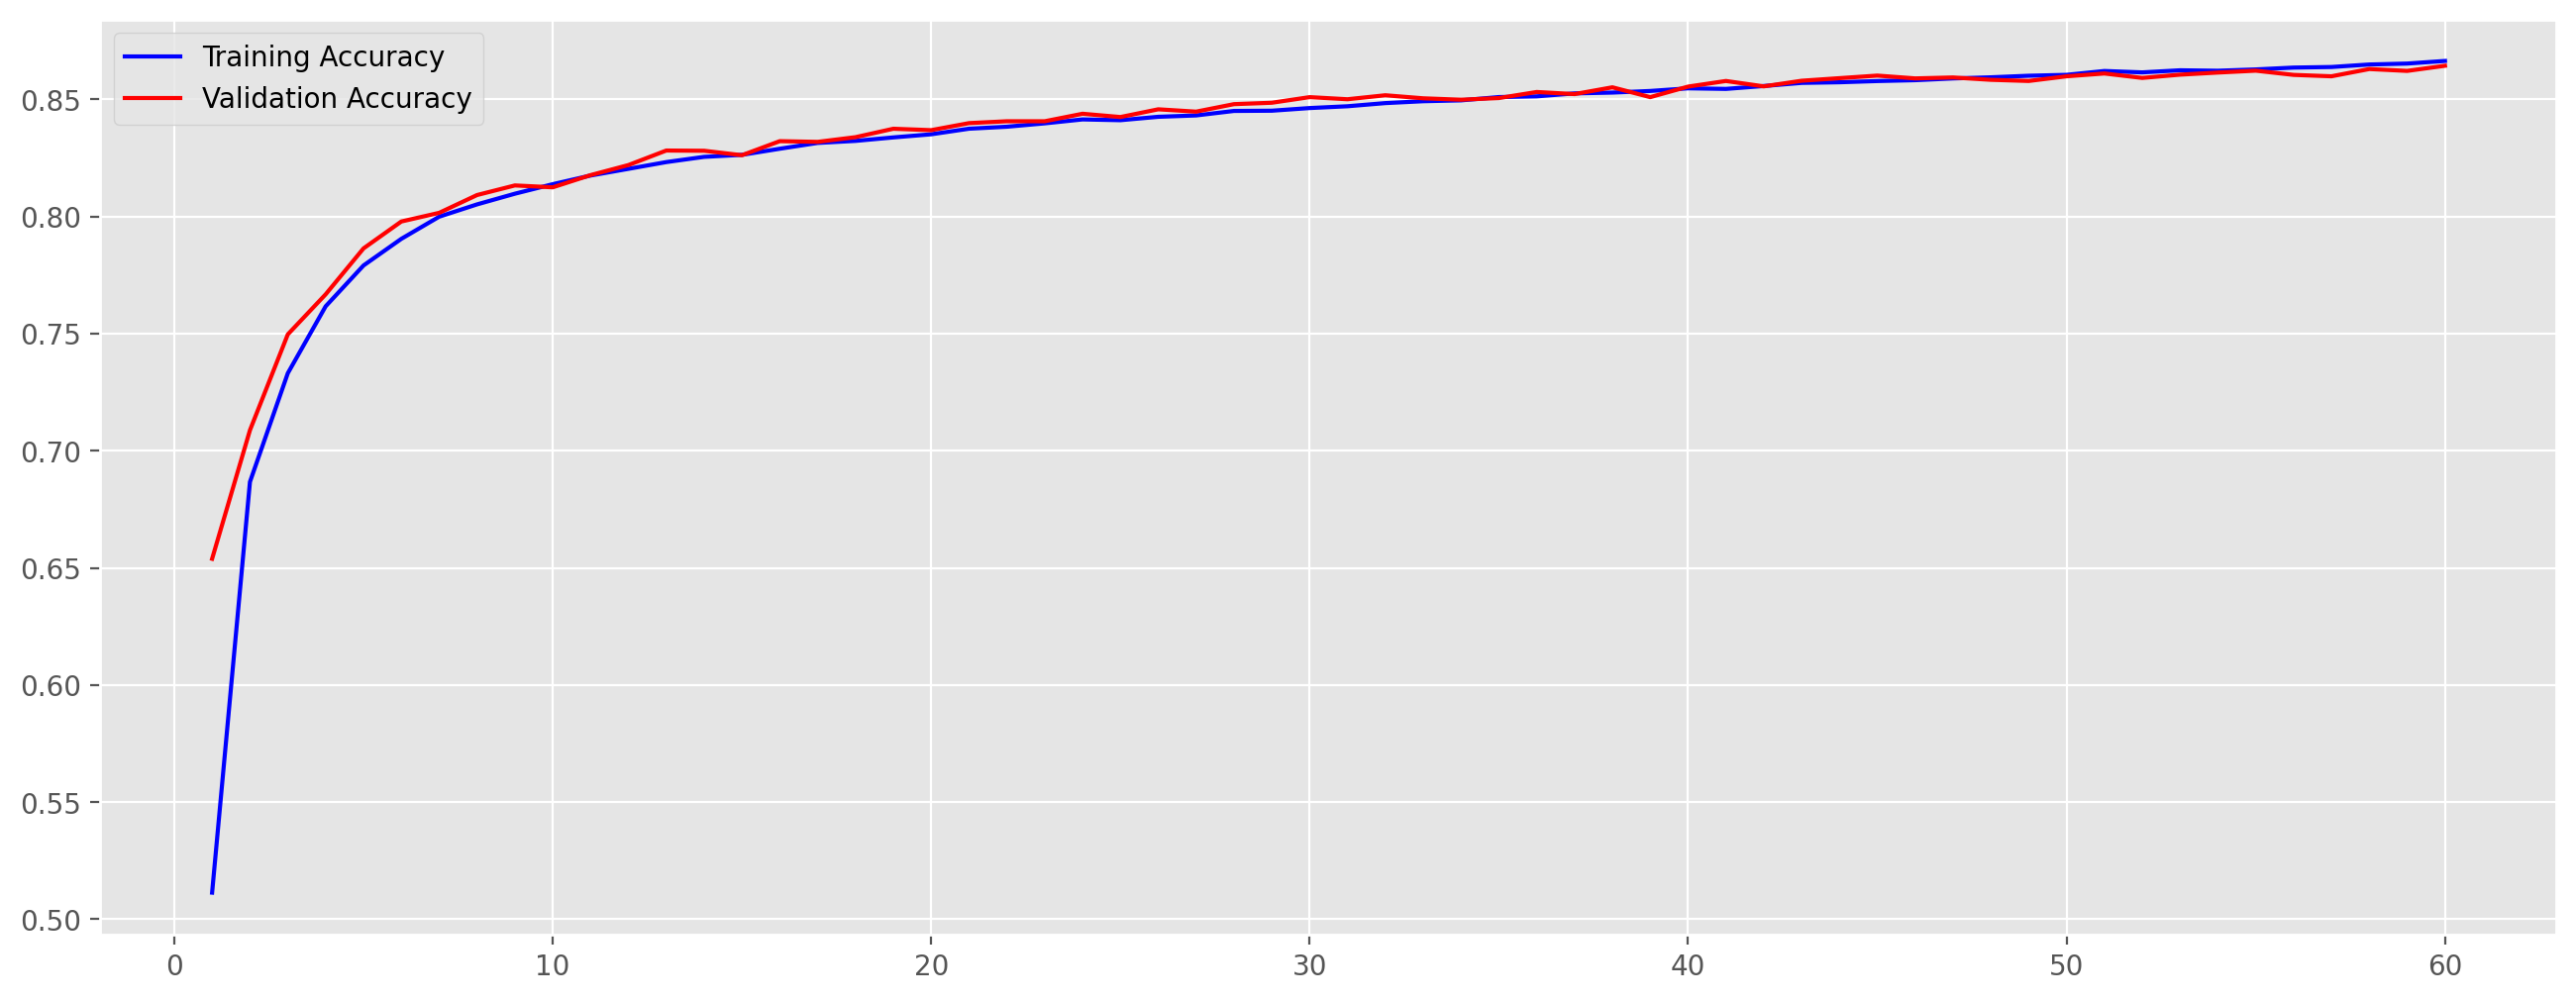

In [63]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']
num_epochs = range(1,61)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

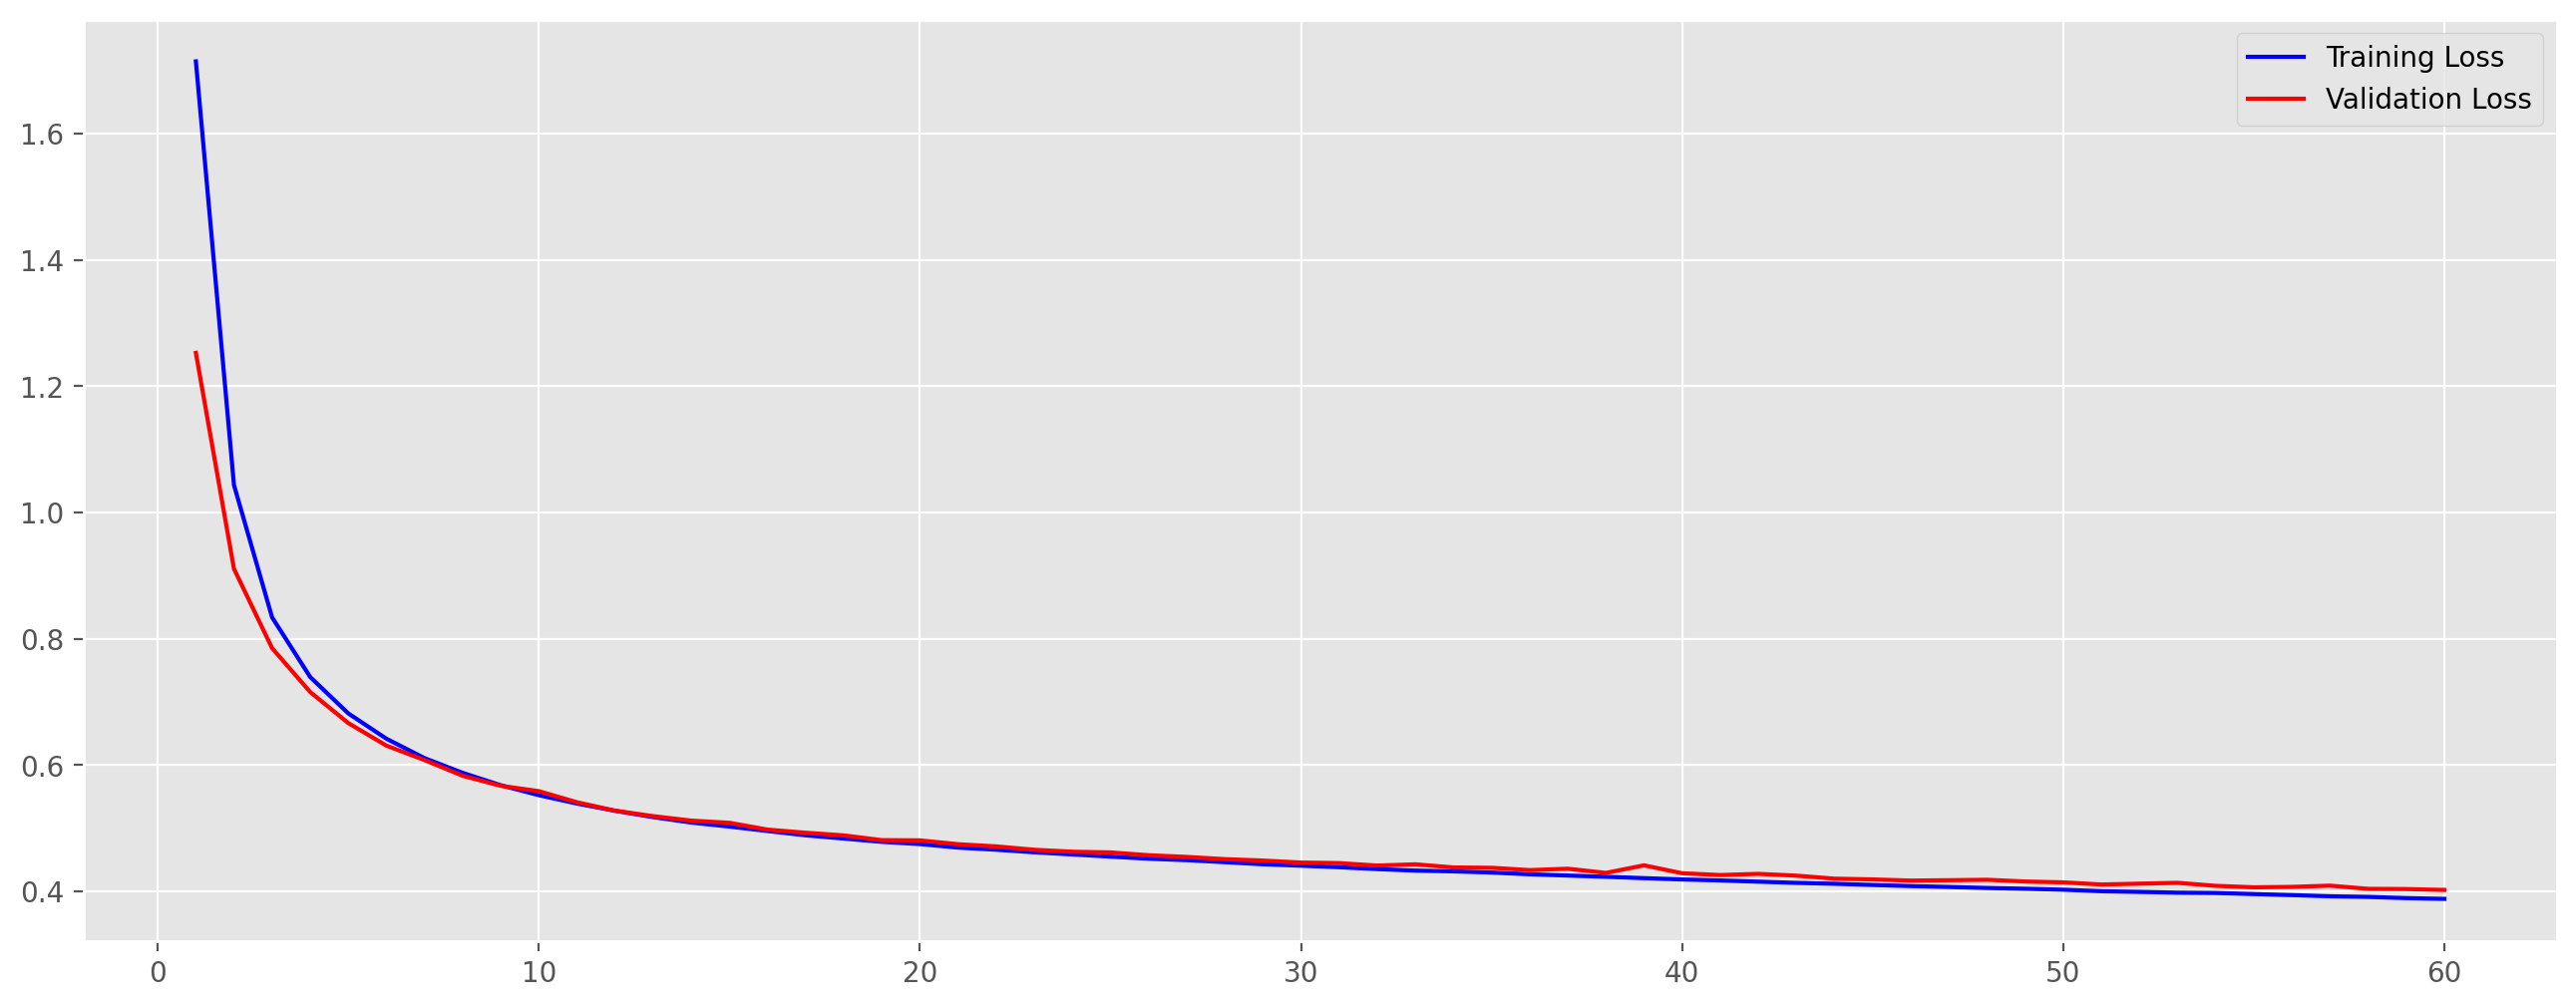

In [64]:
loss_train = history.history['loss']
loss_val   = history.history['val_loss']
num_epochs = range(1,61)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

In [65]:
np.argmax(model.predict(x_test[0:1]), axis = 1)

1/1 [==============================] - 0s 96ms/step


array([0])

In [6]:
np.random.rand(1,10)

array([[0.66592067, 0.20380278, 0.36410173, 0.91116417, 0.28228716,
        0.50960894, 0.18517706, 0.81326472, 0.46130336, 0.27842523]])